In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('TaxiData.csv')

```
Analysis on overall Dataset.
Provide info about columns and its Datatypes.
State missing values and other organic analysis.
```

## Q 1.a

In [3]:
# Check data shape, summary, ...

# Identify missing values
# Plot missing values (customize as needed)
# missing_values.plot(...)

# Any change of data type conversion required?
df

,pickup_community_area,fare,trip_start_month,trip_start_hour,trip_start_day,trip_start_timestamp,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,trip_miles,pickup_census_tract,dropoff_census_tract,payment_type,company,trip_seconds,dropoff_community_area,tips
0,NaN,12.45,5,19,6,1400269500,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,0.0,NaN,0.0
1,NaN,0.00,3,19,5,1362683700,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Unknown,Chicago Elite Cab Corp.,300.0,NaN,0.0
2,60.0,27.05,10,2,3,1380593700,41.836150,-87.648788,NaN,NaN,12.6,NaN,NaN,Cash,Taxi Affiliation Services,1380.0,NaN,0.0
3,10.0,5.85,10,1,2,1382319000,41.985015,-87.804532,NaN,NaN,0.0,NaN,NaN,Cash,Taxi Affiliation Services,180.0,NaN,0.0
4,14.0,16.65,5,7,5,1369897200,41.968069,-87.721559,NaN,NaN,0.0,NaN,NaN,Cash,Dispatch Taxi Affiliation,1080.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,8.0,3.25,5,11,5,1431602100,41.904935,-87.649907,41.904935,-87.649907,0.0,NaN,1.703184e+10,Cash,Taxi Affiliation Services,60.0,8.0,0.0
14998,8.0,3.25,11,16,4,1385568900,41.904935,-87.649907,41.904935,-87.649907,0.0,NaN,1.703184e+10,Cash,Taxi Affiliation Services,0.0,8.0,0.0
14999,8.0,4.25,12,13,3,1449579600,41.904935,-87.649907,41.904935,-87.649907,0.3,NaN,1.703184e+10,Cash,NaN,180.0,8.0,0.0
15000,61.0,9.85,9,15,6,1410534000,41.809018,-87.659167,41.829922,-87.672503,3.0,NaN,NaN,Cash,Taxi Affiliation Services,780.0,59.0,0.0


In [4]:
df.dtypes

pickup_community_area     float64
fare                      float64
trip_start_month            int64
trip_start_hour             int64
trip_start_day              int64
trip_start_timestamp        int64
pickup_latitude           float64
pickup_longitude          float64
dropoff_latitude          float64
dropoff_longitude         float64
trip_miles                float64
pickup_census_tract       float64
dropoff_census_tract      float64
payment_type               object
company                    object
trip_seconds              float64
dropoff_community_area    float64
tips                      float64
dtype: object

In [5]:
df['payment_type'].unique().size

7

In [6]:
df['company'].unique().size

62

In [7]:
categorical = ['pickup_community_area', 'trip_start_month', 'trip_start_hour', 'trip_start_day', 'pickup_census_tract', 'dropoff_community_area', 'dropoff_census_tract', 'payment_type', 'company']
numerical = ['trip_start_timestamp', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'trip_miles', 'fare', 'trip_seconds', 'tips']
len(categorical) + len(numerical)

18

The columns are divided into categorical and numerical according to the unique entries in the column, their datatype and their meaning in the real world.
There was no mixed datatype in the data

In [8]:
for col in categorical:
    df[col] = df[col].astype('category')

In [9]:
df.dtypes

pickup_community_area     category
fare                       float64
trip_start_month          category
trip_start_hour           category
trip_start_day            category
trip_start_timestamp         int64
pickup_latitude            float64
pickup_longitude           float64
dropoff_latitude           float64
dropoff_longitude          float64
trip_miles                 float64
pickup_census_tract       category
dropoff_census_tract      category
payment_type              category
company                   category
trip_seconds               float64
dropoff_community_area    category
tips                       float64
dtype: object

In [10]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

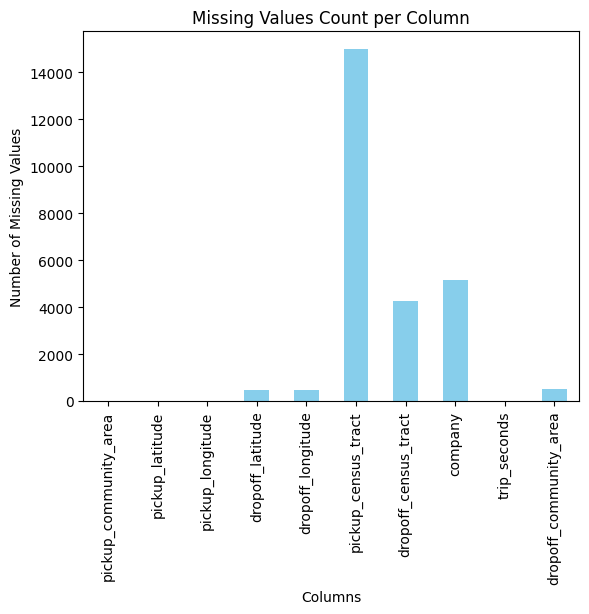

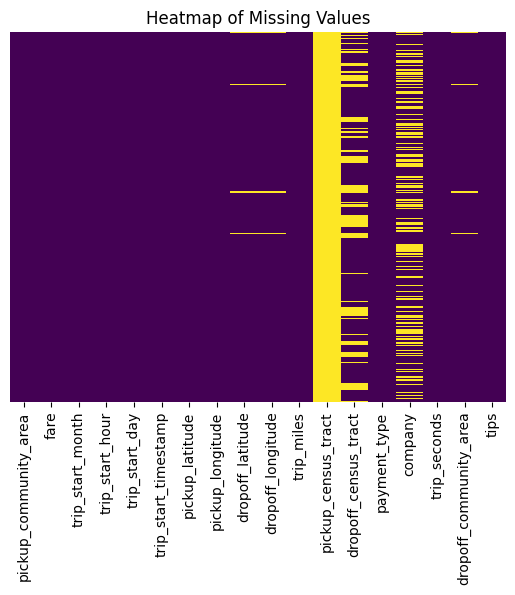

In [11]:
# Bar chart for missing values
# plt.figure(figsize=(10,6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values Count per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.show()

# Heatmap for missing values
# plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [12]:
df.drop(['pickup_census_tract', 'dropoff_census_tract'], axis=1, inplace=True)

As the count of null values in `pickup_census_tract` and `dropoff_census_tract` is very high, we can drop these columns.

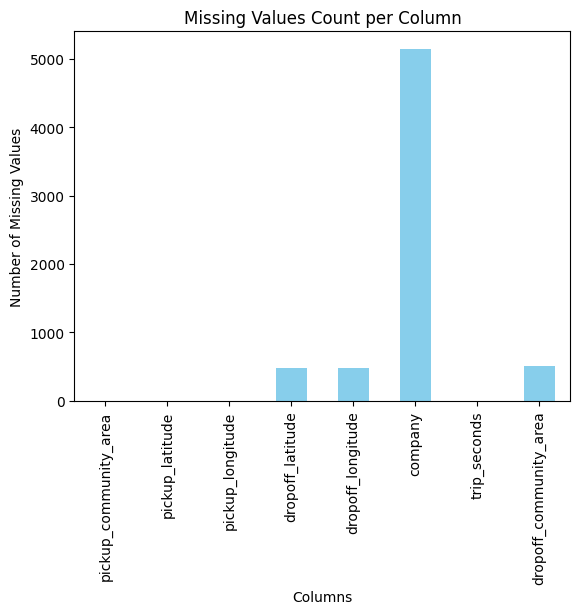

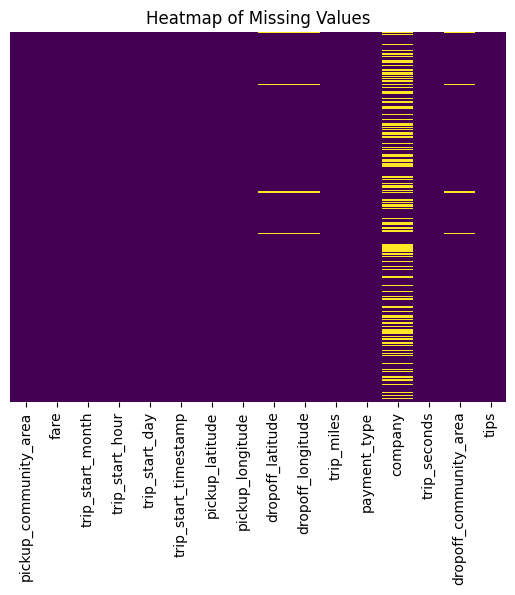

In [13]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
# Bar chart for missing values
# plt.figure(figsize=(10,6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values Count per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.show()

# Heatmap for missing values
# plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [14]:
df_copy = df.copy()
df_copy['company_missing'] = df_copy['company'].isnull()

In [15]:
df['company'] = df['company'].cat.add_categories(['Unknown'])
df['company'] = df['company'].fillna('Unknown')

As the company names might be useful in the analysis, we can fill the missing values with 'Unknown' in the `company` column.

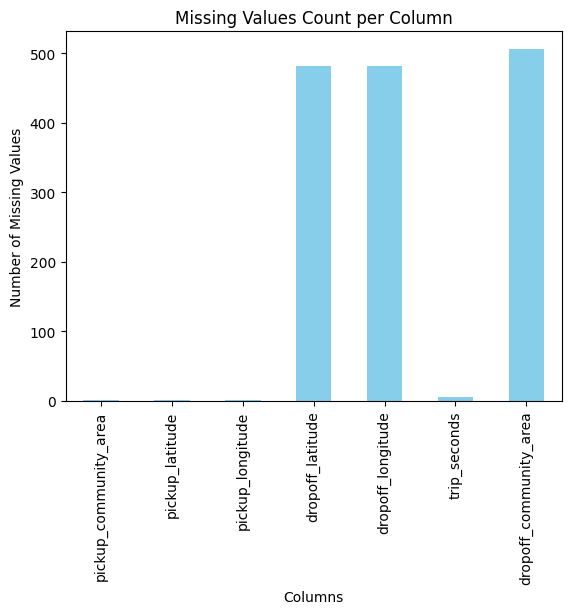

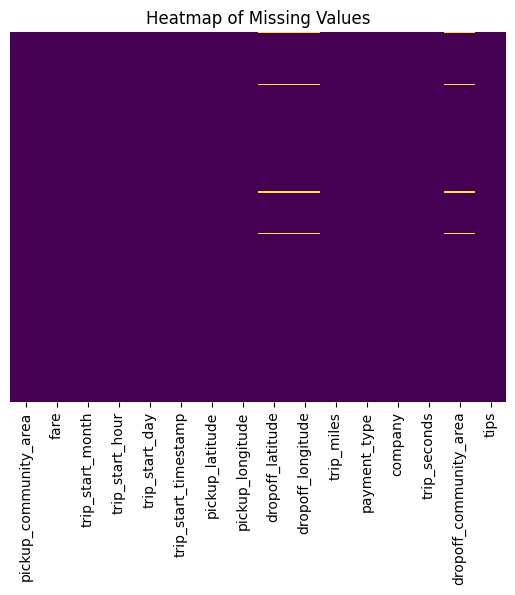

In [16]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
# Bar chart for missing values
# plt.figure(figsize=(10,6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values Count per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.show()

# Heatmap for missing values
# plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [20]:
# Fill na of dropoff_community_area with mode
df['dropoff_community_area'] = df['dropoff_community_area'].fillna(df['dropoff_community_area'].mode()[0])

# Fill na of dropoff latitude and longitude with mean
df['dropoff_latitude'] = df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean())
df['dropoff_longitude'] = df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean())

# Fill trip seconds with mean
df['trip_seconds'] = df['trip_seconds'].fillna(df['trip_seconds'].mean())

# Fill pickup longitude and latitude with mean
df['pickup_latitude'] = df['pickup_latitude'].fillna(df['pickup_latitude'].mean())
df['pickup_longitude'] = df['pickup_longitude'].fillna(df['pickup_longitude'].mean())

# Fill pickup community area with mode
df['pickup_community_area'] = df['pickup_community_area'].fillna(df['pickup_community_area'].mode()[0])

We can replace the null values of categorical columns with the mode of the column and the null values of numerical columns with the mean of the column

In [21]:
df.to_csv('TaxiDataCleaned.csv', index=False)